# To address the business problem of **PowerCo** and gain insights from the data, we can focus on the following topics of interest:

* Low level of differentiation between products available:

Analyze the distribution of the  to understand the different categories of company activities and identify any dominant categories.




---



* Customer Service:

Investigate the channel_sales column to understand the sales channels used and identify any missing values that require cleaning.
Analyze the churn rate based on different sales channels to identify which channels have a higher churn rate.


---



* Keeping Customers For the Long Term:

Explore the distribution of the num_years_antig column to understand the antiquity of clients and identify any long-term customers.
Calculate the average contract duration by subtracting date_activ from date_end and analyze the distribution to determine the typical contract length.

---

* Building Brand Loyalty:

Examine the churn rate based on the origin_up column to identify if customers who subscribed through specific electricity campaigns have higher or lower churn rates.
Analyze the relationship between the number of active products (nb_prod_act) and churn rate to determine if customers with more products are more loyal.

Import The Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from prettytable import PrettyTable

Load The Dataset

In [3]:
# Load the client_data.csv and price_data.csv
'''
Upload The Dataset on your own directly to google collab from your computer or download the csv files from the given link
1)client_data.csv = https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044685365/client_data.csv
2)price_data.csv =  https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044717433/price_data.csv

'''
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')


In [5]:
# Merge the client data and price data based on client id
merged_data = client_data.merge(price_data, on='id')
# Convert date columns to datetime format
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
merged_data[date_columns] = merged_data[date_columns].apply(pd.to_datetime)

In [6]:
# Convert date columns to datetime format
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
merged_data[date_columns] = merged_data[date_columns].apply(pd.to_datetime)

In [7]:
# Explore the data using descriptive statistics
summary_stats = merged_data.describe()

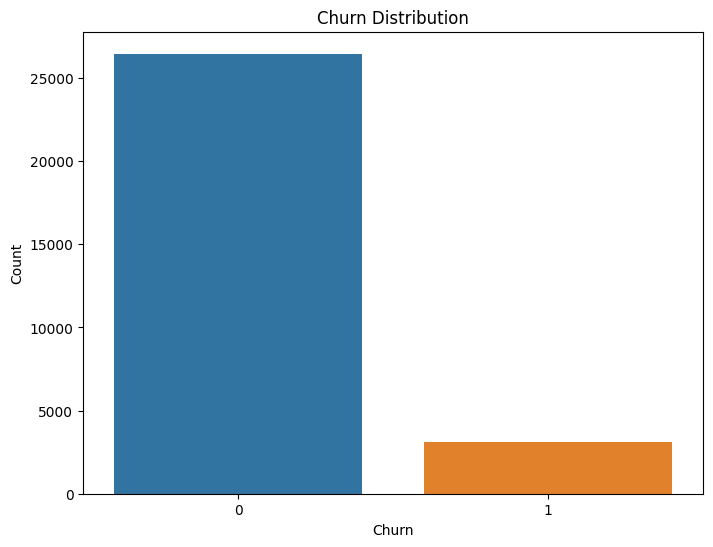

In [8]:
# Visualize the churn distribution
churn_count = merged_data['churn'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_count.index, y=churn_count.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

<ipython-input-9-93fbf2c0cfe1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


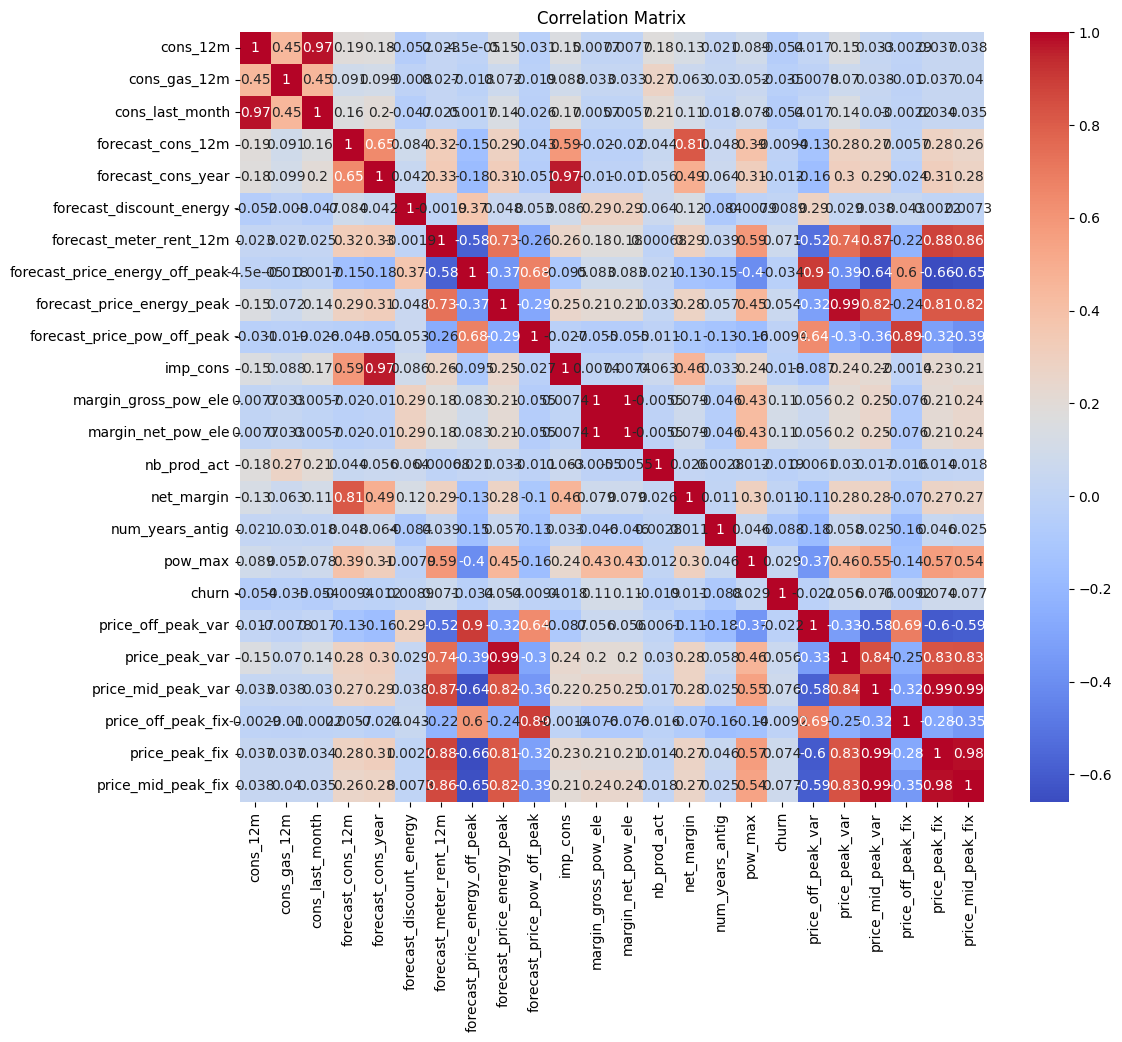

In [9]:
# Calculate and visualize correlations between variables
correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Create interactive tables
summary_stats.to_html('summary_stats.html')
churn_count.to_frame().to_html('churn_count.html')

In [11]:
# Generate interactive visualizations using Plotly
import plotly.express as px

In [12]:
# Interactive bar plot of churn distribution
churn_fig = px.bar(churn_count, x=churn_count.index, y='churn')
churn_fig.update_layout(title='Churn Distribution', xaxis_title='Churn', yaxis_title='Count')
churn_fig.write_html('churn_distribution.html')

In [14]:
# Interactive scatter plot of electricity consumption vs. forecasted consumption
consumption_fig = px.scatter(merged_data, x='cons_12m', y='forecast_cons_12m', color='churn',
                             hover_data=['id', 'channel_sales'])
consumption_fig.update_layout(title='Electricity Consumption vs. Forecasted Consumption',
                              xaxis_title='Actual Consumption', yaxis_title='Forecasted Consumption')
consumption_fig.write_html('consumption_vs_forecast.html')

# Question Based Analysis


# **Can we identify different customer segments based on their electricity and gas consumption patterns? Are there any specific characteristics or behaviors that distinguish one segment from another?**

Ans)
Yes, It Can be done with the help of Market Segmentation.



In [ ]:
#Market Segmentation Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select relevant features for market segmentation
selected_features = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'forecast_cons_year',
                     'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                     'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
                     'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
                     'pow_max']

In [ ]:
# Subset the data with selected features
segmentation_data = client_data[selected_features].copy()


In [ ]:
# Data preprocessing: Standardize the data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

In [ ]:

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(segmentation_data_scaled)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

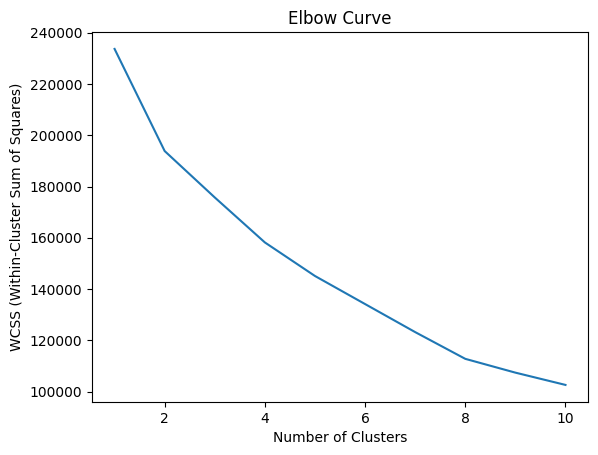

In [ ]:
# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# Based on the elbow curve, select the optimal number of clusters
optimal_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(segmentation_data_scaled)

# Assign cluster labels to the original data
segmentation_data['cluster_label'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_stats = segmentation_data.groupby('cluster_label').mean()

# Create a table for cluster statistics
table = PrettyTable()
table.field_names = ['Cluster Label'] + selected_features

# Add rows to the table
for cluster_label, row in cluster_stats.iterrows():
    table.add_row([cluster_label] + list(row))

# Print the table
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+---------------+--------------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+--------------------------------+----------------------------+-----------------------------+--------------------+----------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
| Cluster Label |      cons_12m      |    cons_gas_12m    | forecast_cons_12m  | forecast_cons_year | forecast_discount_energy | forecast_meter_rent_12m | forecast_price_energy_off_peak | forecast_price_energy_peak | forecast_price_pow_off_peak |      imp_cons      | margin_gross_pow_ele | margin_net_pow_ele |    nb_prod_act     |     net_margin     |  num_years_antig  |      pow_max       |
+---------------+--------------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+--------------------------------+-----------------------

# **Which factors contribute to customer churn? Can we identify any patterns or trends that indicate why customers are leaving? Are there any specific customer segments that are more prone to churn?**

Ans) It Can be done with the help of Customer Churn Analysis


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Merge the datasets on the 'id' column
merged_data = client_data.merge(price_data, on='id', how='left')

# Analyze churn based on selected features
selected_features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
                     'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                     'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
                     'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
                     'origin_up', 'pow_max', 'churn']

churn_analysis_data = merged_data[selected_features]

In [ ]:

churn_analysis_data = merged_data[selected_features]

# Remove categorical features from selected features
numeric_features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
                    'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                    'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele',
                    'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']

churn_analysis_data_numeric = churn_analysis_data[numeric_features]

# Calculate descriptive statistics for churned and non-churned customers
churned_customers = churn_analysis_data_numeric[churn_analysis_data['churn'] == 1]
non_churned_customers = churn_analysis_data_numeric[churn_analysis_data['churn'] == 0]

churn_stats = churned_customers.describe().transpose()
non_churn_stats = non_churned_customers.describe().transpose()

In [ ]:
import plotly.graph_objects as go
# Create interactive table for churn_stats
fig_churn_stats = go.Figure(data=[go.Table(
    header=dict(values=['Feature', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']),
    cells=dict(values=[churn_stats.index, churn_stats['count'], churn_stats['mean'], churn_stats['std'],
                       churn_stats['min'], churn_stats['25%'], churn_stats['50%'], churn_stats['75%'],
                       churn_stats['max']])
)])

# Create interactive table for non_churn_stats
fig_non_churn_stats = go.Figure(data=[go.Table(
    header=dict(values=['Feature', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']),
    cells=dict(values=[non_churn_stats.index, non_churn_stats['count'], non_churn_stats['mean'], non_churn_stats['std'],
                       non_churn_stats['min'], non_churn_stats['25%'], non_churn_stats['50%'], non_churn_stats['75%'],
                       non_churn_stats['max']])
)])

# Update table layout
fig_churn_stats.update_layout(
    title='Descriptive Statistics for Churned Customers',
    width=800,
    height=400
)

fig_non_churn_stats.update_layout(
    title='Descriptive Statistics for Non-Churned Customers',
    width=800,
    height=400
)


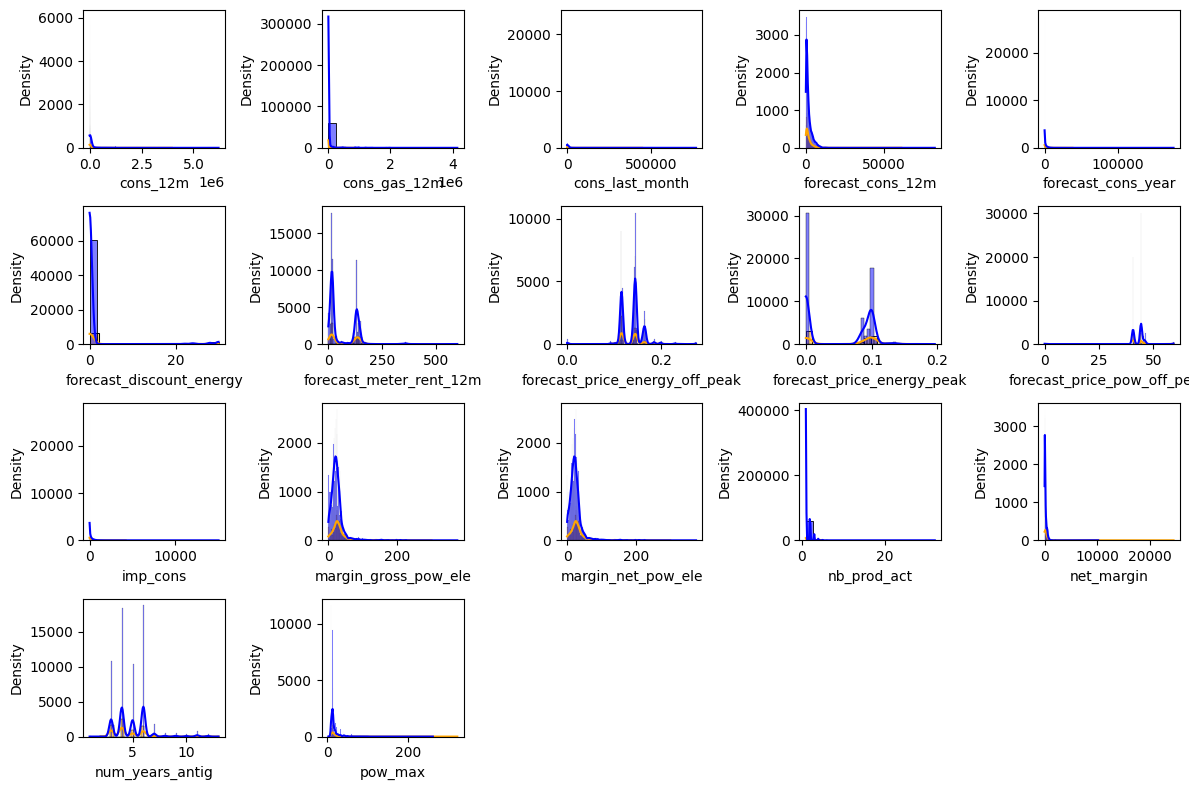

In [ ]:
# Visualize the distribution of selected features for churned and non-churned customers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 5, i + 1)
    sns.histplot(churned_customers[feature], kde=True, color='orange', label='Churned')
    sns.histplot(non_churned_customers[feature], kde=True, color='blue', label='Non-Churned')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

# What is the average lifetime value of a customer? How does it differ between different customer segments? Can we identify high-value customers that are worth investing in for long-term relationships?

Ans) Yes It Can be done by Calculating Current Life Time Value

We calculate the CLV by multiplying the 'net_margin' (total net margin) and 'num_years_antig' (antiquity of the client) columns together.

In [ ]:
# Merge the datasets on the 'id' column
merged_data = client_data.merge(price_data, on='id', how='left')

In [ ]:
# Calculate CLV
merged_data['CLV'] = merged_data['net_margin'] * merged_data['num_years_antig']
# Define the minimum CLV threshold for valuable customers
min_clv_threshold = 10000

In [ ]:
# Filter the data for valuable customers
valuable_customers = merged_data[merged_data['CLV'] >= min_clv_threshold]

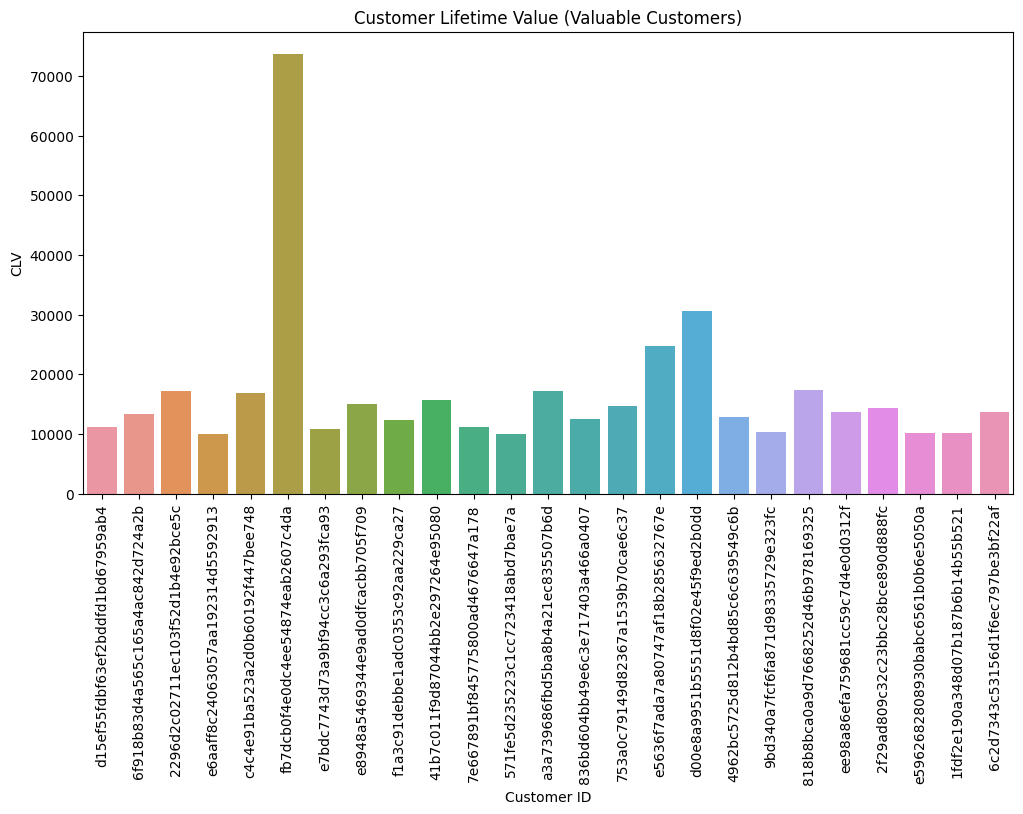

In [ ]:
# Bar plot of CLV for valuable customers
plt.figure(figsize=(12, 6))
sns.barplot(data=valuable_customers, x='id', y='CLV')
plt.xticks(rotation=90)
plt.xlabel('Customer ID')
plt.ylabel('CLV')
plt.title('Customer Lifetime Value (Valuable Customers)')
plt.show()

In [ ]:
# Table of CLV
clv_table = merged_data[['id', 'CLV']]
clv_table = clv_table.sort_values('CLV', ascending=False)
clv_table = clv_table.reset_index(drop=True)
print(clv_table)

                                     id       CLV
0      fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
1      fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
2      fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
3      fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
4      fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
...                                 ...       ...
69505  946b1ca5f573dd65063478624d2e95e3      0.00
69506  946b1ca5f573dd65063478624d2e95e3      0.00
69507  946b1ca5f573dd65063478624d2e95e3      0.00
69508  946b1ca5f573dd65063478624d2e95e3      0.00
69509  c4ee4fc5da68b0131687b83d0e57cc9f      0.00

[69510 rows x 2 columns]


# **Are there any pricing strategies or discounts that lead to higher customer retention and satisfaction? How does the pricing structure impact customer behavior and consumption patterns?**

Ans) Yes, It Can be done with the help of Price-Optimization Strategy

* we explore the pricing strategies by calculating descriptive statistics (mean, median, etc.) for the pricing variables of interest. The describe() function provides summary statistics for the pricing variables.

* We then analyze customer retention by calculating the churn rates and plotting them using a bar plot. This helps us understand the proportion of customers who churned.


* Lastly, we study consumption patterns by creating a scatter plot to visualize the relationship between the price off-peak and electricity consumption over 12 months.


In [ ]:
# Explore Pricing Strategies
pricing_variables = ['price_off_peak_var', 'price_peak_var']
merged_data[pricing_variables].describe()

,price_off_peak_var,price_peak_var
count,59899.000000,59899.000000
mean,0.141994,0.051826
std,0.022990,0.050481
min,0.000000,0.000000
25%,0.126595,0.000000
50%,0.146788,0.084213
75%,0.151635,0.102232
max,0.280700,0.169536


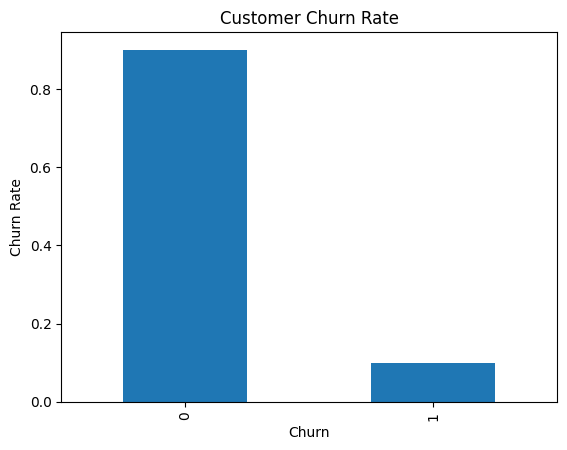

In [ ]:
# Analyze Customer Retention
churn_rates = merged_data['churn'].value_counts(normalize=True)
churn_rates.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Churn Rate')
plt.title('Customer Churn Rate')
plt.show()

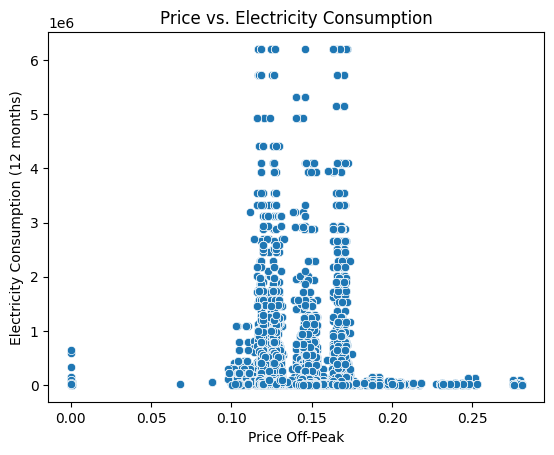

In [ ]:
# Study Consumption Patterns
sns.scatterplot(data=merged_data, x='price_off_peak_var', y='cons_12m')
plt.xlabel('Price Off-Peak')
plt.ylabel('Electricity Consumption (12 months)')
plt.title('Price vs. Electricity Consumption')
plt.show()

# **Extra Information And Dataset Required**

1)The client should consider providing additional data sources. Here are some suggestions:

* **Market Data:**

Including market information such as electricity and gas prices, market trends, competitor data, and overall industry dynamics can provide valuable context for modeling customer behavior and churn prediction.

* **Demographic Data:**

Obtaining demographic data about the SME customers can help identify patterns and correlations between customer characteristics and churn. This may include variables such as customer location, industry sector, company size, and socio-economic factors.

* **Customer Interaction Data:** 

Collecting data on customer interactions, such as call logs, emails, website usage, and social media interactions, can provide valuable insights into customer engagement, satisfaction, and potential reasons for churn.

* **Product and Service Data:** 

Gathering data on the specific products and services used by customers, along with their respective features and usage patterns, can provide a more detailed understanding of customer needs and preferences, and their impact on churn behavior.

* **Billing and Payment Data:** 

Accessing billing and payment data, including information on payment history, billing cycles, overdue payments, and payment methods, can be useful for analyzing financial aspects that may contribute to churn.

* **Customer Satisfaction Surveys:** 

Conducting customer satisfaction surveys or obtaining existing survey data can provide direct feedback from customers regarding their experiences, satisfaction levels, and potential reasons for churn.

* **Competitor Data:** 

Gathering information about competitors, such as pricing strategies, service offerings, and customer acquisition tactics, can provide insights into the competitive landscape and help evaluate the effectiveness of the proposed discount offer.

2)Some open-source datasets that might be useful include:

* **Energy Consumption Datasets:** 

Publicly available datasets on energy consumption, electricity usage patterns, and seasonal variations can provide additional features for modeling customer behavior.

* **Customer Churn Datasets:** 

Open datasets related to customer churn in the given industries can serve as a reference for best practices, feature engineering, and modeling techniques.

* **Social Media Data:** 

Publicly available social media data related to customer sentiment, interactions, and discussions about energy providers can provide insights into customer perceptions and potential factors influencing churn.

* **Economic Data:** 

Open datasets on economic indicators, such as GDP, unemployment rates, and consumer confidence, can help understand the broader economic context and its impact on customer behavior.